In [1]:
#import semua library yang dibutuhkan
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#membaca dataframe
data = pd.read_csv('GBcomments.csv', error_bad_lines=False)
data.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [4]:
#mengecek ringkasan singkat dari dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


In [9]:
#menampilkan 5 record dataframe
data.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [12]:
!pip install textblob
#install text blob untk menggunakan sentimen analisis
from textblob import TextBlob

In [ ]:
#mencari kalimat sentiment dari record pertama dataframe
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity


In [19]:
#klasifikasi sentiment ada 2, yaitu polarity untuk mengetahui apakah teks tersebut positif atau negatif
#dan subjectivity untuk mengetahui apakah teks tersebut berupa opini atau fakta
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment

Sentiment(polarity=0.45000000000000007, subjectivity=0.5666666666666667)

In [21]:
TextBlob('What happened to the home button on the iPhone').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
"""Semakin tinggi subjectivity berarti teks tersebut dikatakan sebagai opini, sedangkan semakin tinggi polarity 
maka semakin positif sebuah teks."""


In [22]:
#mengecek jumlah data yang kosong / missing values
data.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [23]:
#menghapus data yang berisi missing values
data.dropna(inplace=True)

In [24]:
data.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [25]:
#Menampilkan polarity setiap baris data menggunakan perulangan(looping)
polarity=[] #buat list kosong 
for i in data['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)
  

In [28]:
#masukkan semua polarity kedalam dataframe
data['polarity']=polarity

In [29]:
#menampilkan baris data beserta nilai polarity-nya
data.head(10)

video_id  ...  polarity
0  jt2OHQh0HoQ  ...  0.450000
1  jt2OHQh0HoQ  ...  0.000000
2  jt2OHQh0HoQ  ...  0.000000
3  jt2OHQh0HoQ  ...  0.000000
4  jt2OHQh0HoQ  ...  1.000000
5  jt2OHQh0HoQ  ...  0.300000
6  jt2OHQh0HoQ  ...  0.000000
7  jt2OHQh0HoQ  ... -0.100000
8  jt2OHQh0HoQ  ...  0.028571
9  jt2OHQh0HoQ  ...  0.500000

[10 rows x 5 columns]

In [ ]:
#first, i need postive polarity wherever the polarity is equally close to one.
#i have to create a filter over there and i have to pass this filter in dataframe 
#because i have to fetch that particulat data first and define that filter.

In [39]:
#menampilkan komentar positif dengan menset polarity 1
comments_positive=data[data['polarity']==1]

In [40]:
#mengetahui jumlah komentar positif
comments_positive.shape

(20400, 5)

In [41]:
#data yg sudah di filter dengan polarity mendekati 1
comments_positive.head(10)


video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0
202  T_PuZBdT2iM  ...      1.0
206  T_PuZBdT2iM  ...      1.0
237  T_PuZBdT2iM  ...      1.0
243  T_PuZBdT2iM  ...      1.0
283  T_PuZBdT2iM  ...      1.0

[10 rows x 5 columns]

POSSITIVE COMMENTS

In [37]:
!pip install wordcloud

In [ ]:
""" Wordcloud merupakan salah satu metode untuk menampilkan data teks secara visual. 
Grafik ini akan menampilkan frekuensi kata-kata yang digunakan, semakin sering satu kata digunakan, 
maka semakin besar pula ukuran kata tersebut ditampilkan dalam wordcloud.""" 

In [42]:
#import model wordcloud
from wordcloud import WordCloud, STOPWORDS

In [43]:
stopwords = set(STOPWORDS)

In [60]:
comments_positive['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [61]:
' '.join(comments_positive['comment_text']) #menampilkan semua isi ulasan 

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [62]:
total_comment=' '.join(comments_positive['comment_text'])

In [63]:
wordcloud = WordCloud(width=800, height=500, stopwords=stopwords).generate(total_comment)

(-0.5, 799.5, 499.5, -0.5)

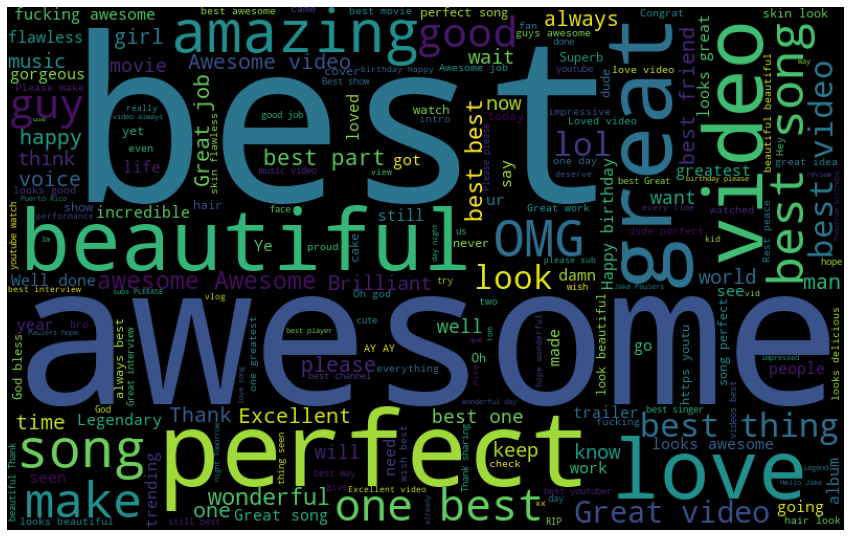

In [64]:
#menampilkan wordcloud teks sentiment yang bernilai positif
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')

NEGATIVE COMMENTS

In [65]:
comments_negative=data[data['polarity']==-1]

In [66]:
total_comment=' '.join(comments_negative['comment_text'])

In [67]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

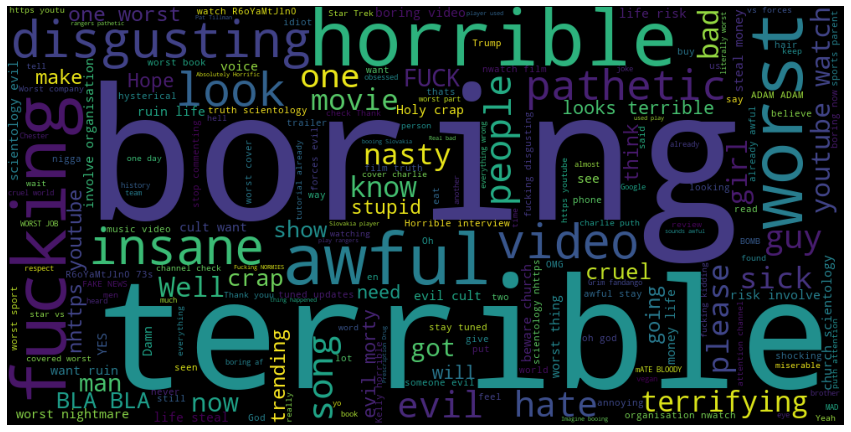

In [68]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
""" conclusion ---
we've performed sentiment analysis as well as we have also performed exploaratory DA for the
negative and positive sentences as well. """


In [75]:
#first, read data 
videos = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [97]:
videos.head() #to preview how exatcly data frame looks like

video_id  ...                          date
0  XpVt6Z1Gjjo  ... 1970-01-01 00:00:00.000000013
1  K4wEI5zhHB0  ... 1970-01-01 00:00:00.000000013
2  cLdxuaxaQwc  ... 1970-01-01 00:00:00.000000013
3  WYYvHb03Eog  ... 1970-01-01 00:00:00.000000013
4  sjlHnJvXdQs  ... 1970-01-01 00:00:00.000000013

[5 rows x 11 columns]

In [77]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623 entries, 0 to 5622
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        5623 non-null   object 
 1   title           5623 non-null   object 
 2   channel_title   5623 non-null   object 
 3   category_id     5623 non-null   int64  
 4   tags            5623 non-null   object 
 5   views           5622 non-null   float64
 6   likes           5622 non-null   float64
 7   dislikes        5622 non-null   float64
 8   comment_total   5622 non-null   float64
 9   thumbnail_link  5622 non-null   object 
 10  date            5622 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 483.4+ KB


In [104]:
videos['date'] = videos['date'].astype('datetime64')

In [102]:
videos.dtypes

video_id                  object
title                     object
channel_title             object
category_id                int64
tags                      object
views                    float64
likes                    float64
dislikes                 float64
comment_total            float64
thumbnail_link            object
date              datetime64[ns]
dtype: object

In [ ]:
#exist this (tags's column)
videos['tags'].head(5)

In [105]:
videos.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             1
likes             1
dislikes          1
comment_total     1
thumbnail_link    1
date              1
dtype: int64

In [106]:
#menggabungkan semua tags
tags_complete = ' '.join(videos['tags'])
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [108]:
#Regex bisa digunakan untuk memeriksa apakah suatu string berisikan pola pencarian yang spesifik
import re

In [109]:
#fungsi sub menggantikan satu atau banyak match dengan sebuah string.
tags = re.sub('[^a-zA-Z]',' ', tags_complete)

In [111]:
#fungsi tersebut akan mengeliminasi extra spacing
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [113]:
tags = re.sub(' +',' ',tags)
tags


'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [114]:
wordcloud = WordCloud(width=1000, height = 500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

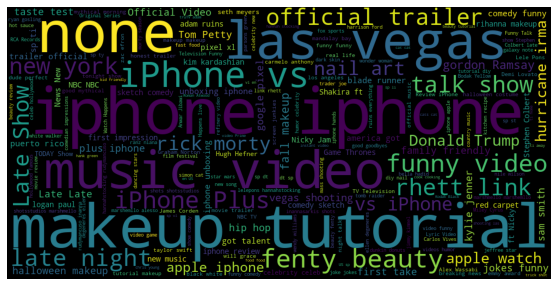

In [115]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off') #disable sumbu grafiknya

In [ ]:
""" conclusion | 
Dapat dilihat bahwa terdapat music video, makeup tutorial, funny video dan beberapa macam tags yang tranding di youtube. """


Mengetahui korelasi antara likes, views, dan dislikes

Text(0.5, 1.0, 'Regression Plot for views and likes')

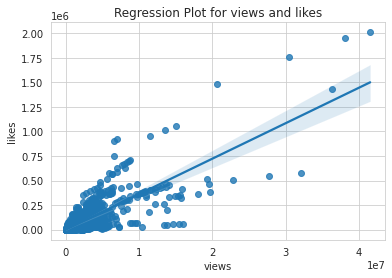

In [120]:
#menggunakan plot regresi untuk menemukan hubungan antara dua variabel
sns.regplot(data=videos, x='views', y='likes') #view dan likes dari data videos 
plt.title("Regression Plot for views and likes")

Text(0.5, 1.0, 'Regression Plot for views and dislikes')

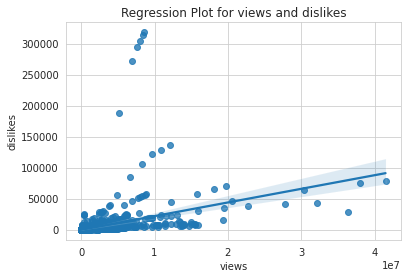

In [121]:
sns.regplot(data=videos, x='views', y='dislikes') #view dan dislikes dari data videos 
plt.title("Regression Plot for views and dislikes")

In [ ]:
""" ==conclusion==
Setiap kali view meningkat, maka likes juga meningkat.
dan setiap kali views meningkat, maka dislikes tidak begitu meningkat.
Itulah kesimpulan yang dapat diambil dari data diatas."""

In [122]:
df_corr = videos[['views', 'likes', 'dislikes']]

In [130]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.827457  0.411832
likes     0.827457  1.000000  0.375228
dislikes  0.411832  0.375228  1.000000

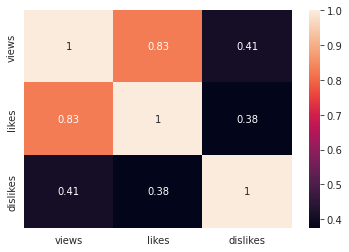

In [129]:
sns.heatmap(df_corr.corr(), annot=True)

In [ ]:
""" Berdasarkan korelasi diatas, views dan likes memiliki tingkat korelasi yang paling tinggi yaitu 0.827 (mendekati 1), 
artinya korelasi antara views dan likes kuat."""

CUTTT------